# Vivendo Fast Food Chain Legal Claims Analysis

## Task 1



In [1]:
import pandas as pd
import numpy as np

In [3]:
food_claims_2212 = pd.read_csv('food_claims_2212.csv', sep=',') # The data from the csv file is converted to a dataframe.
food_claims_2212.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


### claim_id

In [4]:
type_claim_id = food_claims_2212['claim_id'].dtype # The data type of the column is compared with the given description.
print(type_claim_id)

int64


In [5]:
null_claim_id = food_claims_2212['claim_id'].isnull().sum() # It is checked for missing data.
print(null_claim_id)

0


It is verified that `claim_id` has no missing values, and that its data are nominal integers matching the given description.

### time_to_close

In [6]:
type_time_to_close = food_claims_2212['time_to_close'].dtype # The data type of the column is compared with the given description.
print(type_time_to_close)

int64


In [7]:
null_time_to_close = food_claims_2212['time_to_close'].isnull().sum() # It is checked for missing data.
print(null_time_to_close)

0


In [8]:
negative_time_to_close = (food_claims_2212['time_to_close'] < 0).sum() # Check that there are no negative values.
print(negative_time_to_close)

0


It is checked that `time_to_close` has no missing or negative values, so no modification should be made. Also, the data type is integer since it is a discrete quantitative variable.

### claim_amount

In [9]:
type_claim_amount = food_claims_2212['claim_amount'].dtype # The data type of the column is compared with the given description.
print(type_claim_amount)

object


In [10]:
food_claims_2212['claim_amount'] = np.float64(food_claims_2212['claim_amount'].str.strip('R$ ').astype(float)) # Due to divergence from the description, the values are converted to float numbers.
food_claims_2212['claim_amount'] = food_claims_2212['claim_amount'].round(2) # The new values are rounded to two decimal places.
food_claims_2212['claim_amount'].head()

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

In [11]:
null_claim_amount = food_claims_2212['claim_amount'].isnull().sum() # It is checked for missing data.
print(null_claim_amount)

0


The `claim_amount` column containing the Brazilian currency symbol was considered an object variable and could not be used for numerical analysis and did not meet the description. Therefore, the column was transformed to be a continuous variable and rounded to two decimal places. In addition, it had no missing value.

### amount_paid

In [12]:
type_amount_paid = food_claims_2212['amount_paid'].dtype # The data type of the column is compared with the given description.
print(type_amount_paid)

float64


In [13]:
null_amount_paid = food_claims_2212['amount_paid'].isnull().sum() # It is checked for missing data.
print(null_amount_paid)

36


In [13]:
median_amount_paid = food_claims_2212['amount_paid'].median() # Since there are null values, the median is calculated.
print(median_amount_paid)

20105.699999999997


In [14]:
food_claims_2212['amount_paid'].fillna(median_amount_paid, inplace=True) # The null values are replaced with the previously calculated median.

In [15]:
null_amount_paid_2 = food_claims_2212['amount_paid'].isnull().sum() # It is checked again if there are null values after the procedures performed.
print(null_amount_paid_2)

0


In [16]:
food_claims_2212['amount_paid'] = food_claims_2212['amount_paid'].round(2) # Column values are rounded to two decimal places.

The `amount_paid` column was a continuous variable. However, 36 null values were found, which had to be replaced with the median of the same column as mentioned in the description. Subsequently, the values were rounded to two decimal places.

### location

In [17]:
type_location = food_claims_2212['location'].dtype # The data type of the column is compared with the given description.
print(type_location)

object


In [18]:
different_location = food_claims_2212['location'][~food_claims_2212['location'].isin(['RECIFE', 'SAO LUIS', 'FORTALEZA', 'NATAL'])] # It is checked if there are values other than the four allowed values.
print(len(different_location))

0


In [19]:
null_location = food_claims_2212['location'].isnull().sum() # It is checked for missing data.
print(null_location)

0


It is verified that `location` is a nominal variable, and that it does not contain any null value or any value other than the four allowed values.

### individuals_on_claim

In [20]:
type_individuals_on_claim = food_claims_2212['individuals_on_claim'].dtype # The data type of the column is compared with the given description.
print(type_individuals_on_claim)

int64


In [21]:
min_individuals_on_claim = (food_claims_2212['individuals_on_claim'] < 1).sum() # Check if there are values below the minimum allowed value.
print(min_individuals_on_claim)

0


In [22]:
null_individuals_on_claim = food_claims_2212['individuals_on_claim'].isnull().sum() # It is checked for missing data.
print(null_individuals_on_claim)

0


The `individuals_on_claim` column is a discrete variable as it is a count. Moreover, no value is less than 1 nor are they null.

### linked_cases

In [23]:
type_linked_cases = food_claims_2212['linked_cases'].dtype # The data type of the column is compared with the given description.
print(type_linked_cases)

object


In [24]:
different_linked_cases = food_claims_2212['linked_cases'][~food_claims_2212['linked_cases'].isin([True, False])] # It is checked if there are values other than the two allowed values.
print(len(different_linked_cases))

26


In [25]:
null_linked_cases = food_claims_2212['linked_cases'].isnull().sum() # It is checked for missing data.
print(null_linked_cases)

26


In [26]:
food_claims_2212['linked_cases'] = food_claims_2212['linked_cases'].fillna(False) # The missing values are replaced with the value indicated in the given description.

In [27]:
null_linked_cases_2 = food_claims_2212['linked_cases'].isnull().sum() # It is checked for missing data.
print(null_linked_cases_2)

0


In the `linked_cases` column, 26 null values were found, which had to be replaced with the value False. In addition, it was verified that the column is a variable of nominal type.

### cause

In [28]:
type_cause = food_claims_2212['cause'].dtype # The data type of the column is compared with the given description.
print(type_cause)

object


In [29]:
different_cause = food_claims_2212['cause'][~food_claims_2212['cause'].isin(['vegetable', 'meat', 'unknown'])] # It is checked if there are values other than the three allowed values.
print(different_cause)

91            Meat
130     VEGETABLES
132           Meat
152     VEGETABLES
172           Meat
208           Meat
232     VEGETABLES
238           Meat
319     VEGETABLES
390           Meat
411     VEGETABLES
433     VEGETABLES
439     VEGETABLES
522     VEGETABLES
547     VEGETABLES
825     VEGETABLES
971           Meat
998           Meat
1064    VEGETABLES
1104          Meat
1109          Meat
1146          Meat
1272    VEGETABLES
1292          Meat
1410    VEGETABLES
1436    VEGETABLES
1701          Meat
1704          Meat
1786    VEGETABLES
1874    VEGETABLES
Name: cause, dtype: object


In [30]:
food_claims_2212['cause'].replace('VEGETABLES', 'vegetable', inplace=True) # Values with a different format are replaced with the appropriate format.

In [31]:
food_claims_2212['cause'] = food_claims_2212['cause'].str.strip()
food_claims_2212['cause'].replace('Meat', 'meat', inplace=True) # Values with a different format are replaced with the appropriate format.

In [32]:
different_cause_2 = food_claims_2212['cause'][~food_claims_2212['cause'].isin(['vegetable', 'meat', 'unknown'])] # A further check is made to see if there are other values than those allowed.
print(different_cause_2)

Series([], Name: cause, dtype: object)


In [33]:
null_cause = food_claims_2212['cause'].isnull().sum() # It is checked for missing data.
print(null_cause)

0


The `cause` column has nominal type values, and has no missing values. On the other hand, there were some values with a different format than the one mentioned in the description, so they were replaced with the indicated format (lowercase and singular).

## Task 2

In [14]:
/*
	This query selects a single variable and counts the number of values in order to create a bar chart.
*/
SELECT location, COUNT(*)
FROM food_claims_2212
GROUP BY location;

IndentationError: unexpected indent (2037055361.py, line 2)

### State which category of the variable location has the most observations.
**RECIFE** is the location variable with the highest number of claims.

### Explain whether the observations are balanced across categories of the variable location.
On the other hand, it is observed that the number of claims is unbalanced among the locations, since all the categories of the variable `location` have different sizes.

## Task 3

In [15]:
import matplotlib.pyplot as plt
from scipy import stats
# The matplotlib and stats libraries are imported.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18428\3039816443.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  tc_mode = stats.mode(food_claims_2212['time_to_close'])[0][0]


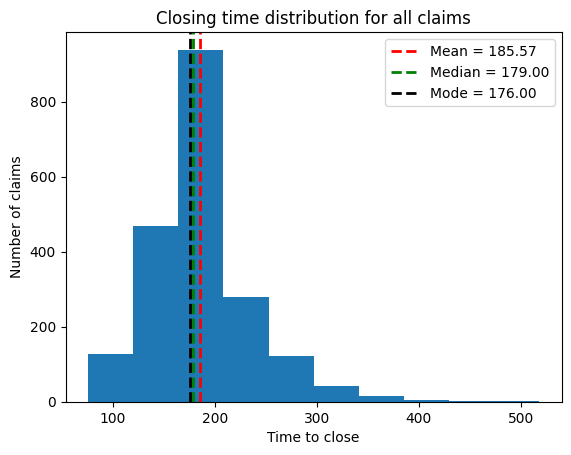

In [16]:
plt.hist(food_claims_2212['time_to_close'], bins=10) # A histogram is created because it is only one variable to be displayed.

tc_mean = np.mean(food_claims_2212['time_to_close'])
tc_median = np.median(food_claims_2212['time_to_close'])
tc_mode = stats.mode(food_claims_2212['time_to_close'])[0][0]
# The mean, median and mode values are calculated to improve the understanding of the distribution.

plt.axvline(tc_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {tc_mean:.2f}')
plt.axvline(tc_median, color='green', linestyle='dashed', linewidth=2, label=f'Median = {tc_median:.2f}')
plt.axvline(tc_mode, color='black', linestyle='dashed', linewidth=2, label=f'Mode = {tc_mode:.2f}')

plt.legend()

plt.xlabel('Time to close')
plt.ylabel('Number of claims')
plt.title('Closing time distribution for all claims')
plt.show()

### Describe the distribution of time to close for all claims.
Observing the graph of the distribution of the closing time, it can be said that it is an skewed distribution towards the right or positive skewness, because it is in the following order: mode, median and mean. In addition, the largest amount of data is on the left side of the graph.

## Task 4

In [18]:
import seaborn as sns # The seaborn library is imported.

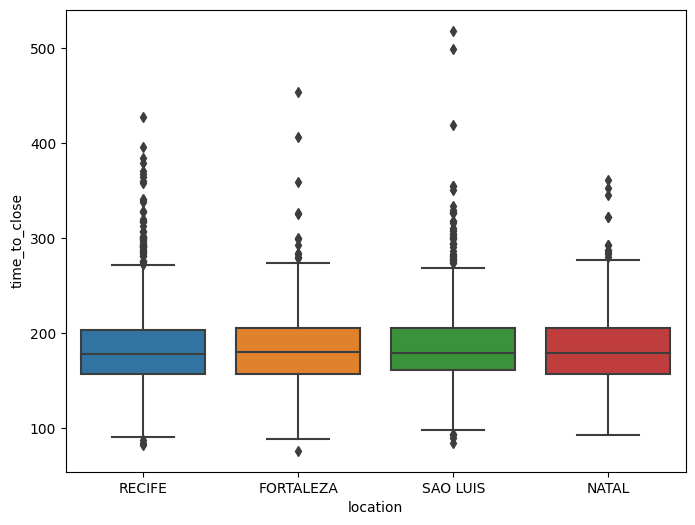

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='location', y='time_to_close', data=food_claims_2212[['location', 'time_to_close']]) # A chart of several boxplots is created due to the fact that there is a categorical variable and a quantitative variable.
plt.show()

### Describe the relationship between time to close and location.
Based on the graph, no relationship between `location` and `time_to_close` can be found, since the four boxes have a similar size and median. The only observable difference is in some outliers.